In [1]:
# ライブラリの特定のバージョンへ変更する
!pip install tensorflow==1.14

In [2]:
#Reutersデータセットを読み込む(3-12)
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [33]:
print(len(train_data))
print(len(test_data))

print(train_data[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [4]:
#ニュースサンプルをテキストに変換する
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#インデックスのオフセットとして3が指定されているのは、
#0,1,2がそれぞれ「パディング」、「シーケンスの開始」、「不明」の
#インデックスとして予約されているためであることに注意
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

#デコードしたニュースの内容を表示
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [5]:
print(train_labels[10])

3


In [0]:
#データのエンコーディング(3-14)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

#訓練データのベクトル化
x_train = vectorize_sequences(train_data)
#テストデータのベクトル化
x_test = vectorize_sequences(test_data)

In [0]:
#one-hotエンコーディング
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

#ベクトル化された訓練ラベル
one_hot_train_labels = to_one_hot(train_labels)
#ベクトル化されたテストラベル
one_hot_test_labels = to_one_hot(test_labels)

#Kerasには、one-hotエンコーディングの機能が用意されている
# from keras.utils.np_utils import to_categorical

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [0]:
#モデルの定義(3-15)
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [11]:
#モデルのコンパイル(3-16)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#検証データセットの設定(3-17)
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
#モデルの訓練(3-18)
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 154us/step - loss: 2.7666 - acc: 0.5195 - val_loss: 1.8880 - val_acc: 0.6200
Epoch 2/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.5176 - acc: 0.6883 - val_loss: 1.3925 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.1041 - acc: 0.7638 - val_loss: 1.1650 - val_acc: 0.7510
Epoch 4/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.8689 - acc: 0.8162 - val_loss: 1.0432 - val_acc: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.6826 - acc: 0.8587 - val_loss: 0.9758 - val_acc: 0.7960
Epoch 6/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.5476 - acc: 0.8886 - val_loss: 0.9247 - val_acc: 0.8060
Epoch 7/20
7982/7982 [===================

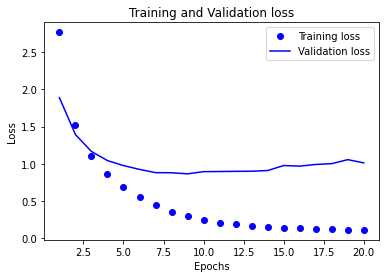

In [15]:
#訓練データと検証データでの損失値をプロット(3-19)
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

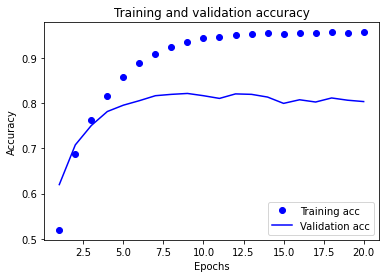

In [17]:
#訓練データと検証データでの正答率をプロット(3-20)
plt.clf() #図を消去

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
#モデルの訓練をやり直す(3-21)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 230us/step - loss: 2.6610 - acc: 0.5125 - val_loss: 1.7574 - val_acc: 0.6460
Epoch 2/8
7982/7982 [==============================] - 1s 121us/step - loss: 1.4262 - acc: 0.7136 - val_loss: 1.3164 - val_acc: 0.7110
Epoch 3/8
7982/7982 [==============================] - 1s 125us/step - loss: 1.0605 - acc: 0.7783 - val_loss: 1.1522 - val_acc: 0.7550
Epoch 4/8
7982/7982 [==============================] - 1s 121us/step - loss: 0.8410 - acc: 0.8244 - val_loss: 1.0497 - val_acc: 0.7810
Epoch 5/8
7982/7982 [==============================] - 1s 120us/step - loss: 0.6752 - acc: 0.8592 - val_loss: 0.9792 - val_acc: 0.8080
Epoch 6/8
7982/7982 [==============================] - 1s 122us/step - loss: 0.5454 - acc: 0.8856 - val_loss: 0.9565 - val_acc: 0.8000
Epoch 7/8
7982/7982 [==============================] - 1s 121us/step - loss: 0.4372 - acc: 0.9103 - val_loss: 0.9196 - val_acc: 0.8100
Epoch 8

In [23]:
#完全にランダムな場合の確率
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
print(float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels))
#約19%

0.18967052537845058


In [25]:
#新しいデータで予測値を生成(3-22)
predictions = model.predict(x_test)

print(predictions[0].shape)

print(np.sum(predictions[0]))

print(np.argmax(predictions[0]))

(46,)
1.0000001
3


In [0]:
#ラベルと損失値を処理する別の方法
#y_train = np.array(train_labels)
#y_test = np.array(test_labels)

#ラベルを整数のテンソルとしてキャストする場合、損失関数としてcategorical_crossentropyではなく、sparse_categorical_crossentropyを使用する必要がある。
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [42]:
#情報ボトルネックを持つモデル(3-23)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 163us/step - loss: 3.3448 - acc: 0.1580 - val_loss: 2.9348 - val_acc: 0.5220
Epoch 2/20
7982/7982 [==============================] - 1s 118us/step - loss: 2.6346 - acc: 0.5551 - val_loss: 2.4049 - val_acc: 0.5750
Epoch 3/20
7982/7982 [==============================] - 1s 121us/step - loss: 2.1203 - acc: 0.5963 - val_loss: 2.0089 - val_acc: 0.5960
Epoch 4/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.7585 - acc: 0.6223 - val_loss: 1.7551 - val_acc: 0.6180
Epoch 5/20
7982/7982 [==============================] - 1s 117us/step - loss: 1.5261 - acc: 0.6411 - val_loss: 1.6071 - val_acc: 0.6240
Epoch 6/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.3667 - acc: 0.6619 - val_loss: 1.5198 - val_acc: 0.6410
Epoch 7/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.2487 - acc: 0.6907 - val_loss: 1.4475 - val_acc: 0.6520


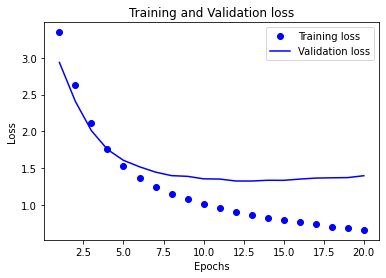

In [43]:
#訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

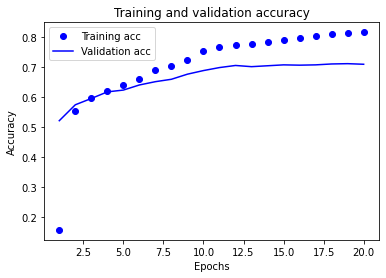

In [44]:
#訓練データと検証データでの正答率をプロット
plt.clf() #図を消去

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#これ以降、追加実習
実習項目

1.   隠れユニットの数が多いまたは少ない層で試してみる(128ユニット)
2.   隠れユニットの数が多いまたは少ない層で試してみる(256ユニット)
3.   隠れユニットの数が多いまたは少ない層で試してみる(32ユニット)
4.   隠れユニットの数が多いまたは少ない層で試してみる(2ユニット)
5.   隠れ層1つにした場合に結果にどのような影響が与えられるのかを検証する
6.   隠れ層3つにした場合に結果にどのような影響が与えられるのかを検証する

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 182us/step - loss: 2.3760 - acc: 0.5145 - val_loss: 1.5595 - val_acc: 0.6600
Epoch 2/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.2824 - acc: 0.7240 - val_loss: 1.2168 - val_acc: 0.7410
Epoch 3/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.9530 - acc: 0.7985 - val_loss: 1.0678 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.7372 - acc: 0.8414 - val_loss: 0.9842 - val_acc: 0.7930
Epoch 5/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.5788 - acc: 0.8745 - val_loss: 0.9251 - val_acc: 0.8050
Epoch 6/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.4530 - acc: 0.9032 - val_loss: 0.9039 - val_acc: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.3584 - acc: 0.9235 - val_loss: 0.8919 - val_acc: 0.8220


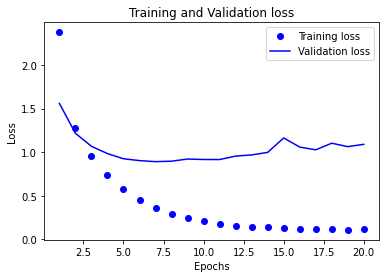

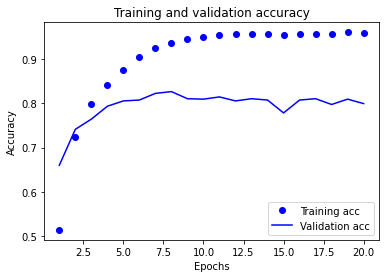

In [45]:
#1.隠れユニットの数が多いまたは少ない層で試してみる(128ユニット)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

#訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
plt.clf() #図を消去

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 182us/step - loss: 2.4233 - acc: 0.5175 - val_loss: 1.5108 - val_acc: 0.6560
Epoch 2/20
7982/7982 [==============================] - 1s 130us/step - loss: 1.2799 - acc: 0.7177 - val_loss: 1.1938 - val_acc: 0.7360
Epoch 3/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.9497 - acc: 0.7962 - val_loss: 1.0695 - val_acc: 0.7590
Epoch 4/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.7403 - acc: 0.8370 - val_loss: 1.0064 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.5712 - acc: 0.8748 - val_loss: 0.9808 - val_acc: 0.7910
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.4465 - acc: 0.9029 - val_loss: 0.9209 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.3422 - acc: 0.9256 - val_loss: 0.8966 - val_acc: 0.8090


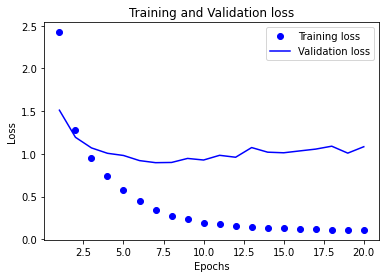

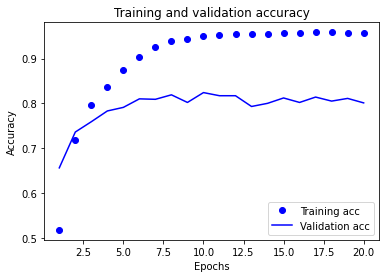

In [46]:
#2.隠れユニットの数が多いまたは少ない層で試してみる(256ユニット)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

#訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
plt.clf() #図を消去

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 181us/step - loss: 2.7526 - acc: 0.4883 - val_loss: 1.8727 - val_acc: 0.6070
Epoch 2/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.5123 - acc: 0.6863 - val_loss: 1.3785 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.1003 - acc: 0.7695 - val_loss: 1.1719 - val_acc: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.8736 - acc: 0.8170 - val_loss: 1.0761 - val_acc: 0.7730
Epoch 5/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.7124 - acc: 0.8487 - val_loss: 1.0217 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.5815 - acc: 0.8767 - val_loss: 0.9597 - val_acc: 0.7940
Epoch 7/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.4773 - acc: 0.8994 - val_loss: 0.9232 - val_acc: 0.8160


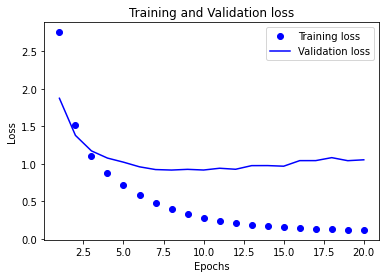

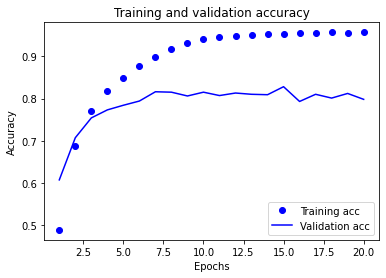

In [47]:
#3.隠れユニットの数が多いまたは少ない層で試してみる(32ユニット)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

#訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
plt.clf() #図を消去

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 187us/step - loss: 3.5983 - acc: 0.2156 - val_loss: 3.4171 - val_acc: 0.2390
Epoch 2/20
7982/7982 [==============================] - 1s 122us/step - loss: 3.2932 - acc: 0.2389 - val_loss: 3.1806 - val_acc: 0.2460
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 3.0492 - acc: 0.2448 - val_loss: 2.9666 - val_acc: 0.2520
Epoch 4/20
7982/7982 [==============================] - 1s 122us/step - loss: 2.8504 - acc: 0.2544 - val_loss: 2.8138 - val_acc: 0.2600
Epoch 5/20
7982/7982 [==============================] - 1s 122us/step - loss: 2.6933 - acc: 0.2697 - val_loss: 2.6772 - val_acc: 0.2800
Epoch 6/20
7982/7982 [==============================] - 1s 121us/step - loss: 2.5497 - acc: 0.2849 - val_loss: 2.5451 - val_acc: 0.2830
Epoch 7/20
7982/7982 [==============================] - 1s 123us/step - loss: 2.3919 - acc: 0.2870 - val_loss: 2.3796 - val_acc: 0.2820


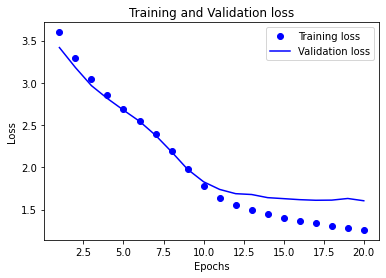

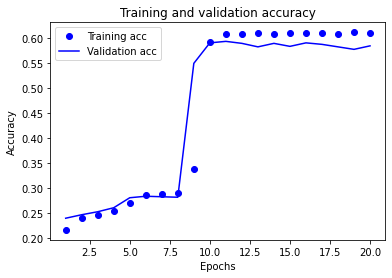

In [48]:
#4.隠れユニットの数が多いまたは少ない層で試してみる(2ユニット)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

#訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
plt.clf() #図を消去

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 187us/step - loss: 2.5750 - acc: 0.5687 - val_loss: 1.8112 - val_acc: 0.6510
Epoch 2/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.4728 - acc: 0.7230 - val_loss: 1.3501 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.0724 - acc: 0.7824 - val_loss: 1.1384 - val_acc: 0.7600
Epoch 4/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.8321 - acc: 0.8319 - val_loss: 1.0215 - val_acc: 0.7810
Epoch 5/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.6650 - acc: 0.8727 - val_loss: 0.9478 - val_acc: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.5409 - acc: 0.8973 - val_loss: 0.8908 - val_acc: 0.8210
Epoch 7/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.4459 - acc: 0.9128 - val_loss: 0.8595 - val_acc: 0.8190


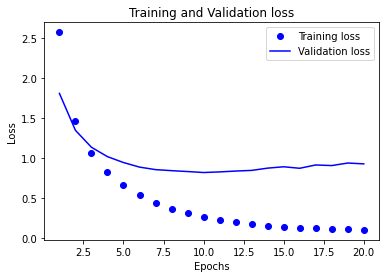

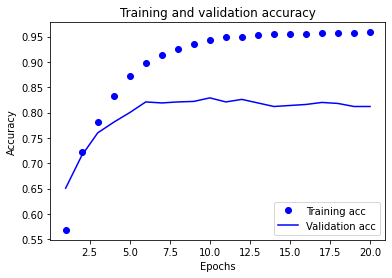

In [49]:
#5.隠れ層1つにした場合に結果にどのような影響が与えられるのかを検証する
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

#訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
plt.clf() #図を消去

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 202us/step - loss: 2.5034 - acc: 0.5001 - val_loss: 1.6479 - val_acc: 0.6050
Epoch 2/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.4350 - acc: 0.6862 - val_loss: 1.3480 - val_acc: 0.6910
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.1151 - acc: 0.7476 - val_loss: 1.1890 - val_acc: 0.7300
Epoch 4/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.9062 - acc: 0.7957 - val_loss: 1.0977 - val_acc: 0.7560
Epoch 5/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.7346 - acc: 0.8331 - val_loss: 1.0094 - val_acc: 0.7860
Epoch 6/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.5778 - acc: 0.8690 - val_loss: 0.9817 - val_acc: 0.7950
Epoch 7/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.4576 - acc: 0.9002 - val_loss: 0.9755 - val_acc: 0.8080


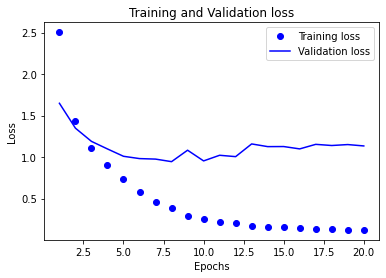

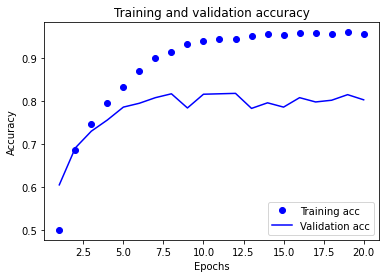

In [50]:
#6.隠れ層2つにした場合に結果にどのような影響が与えられるのかを検証する
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

#訓練データと検証データでの損失値をプロット
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#訓練データと検証データでの正答率をプロット
plt.clf() #図を消去

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()